# INFO 251: Final project

#### Members: Marius Brogaard Lerstein and Tuva Cornelia Oppenhagen

## Introduction

Bike sharing is a growing transportation method in many cities around the world, with over 500 rental programs with a total of over 500 thousand bikes, an important insight to the business is how many bikes are rented per day. With factors such as weather, weekend, temperature, wind information etc. affecting the number of rentals, this gives a good foundation for a machine learning classification problem. In our research project, we want to try out different classification algorithms to predict the amount of bikes that were rented in a given day. The models we want to try out include; logistic regression, Naive Bayes, K-Nearest Neighbors, Decision Trees, Random Forests.

The dataset we are going to use contains the count of rental bikes between 2011 and 2012 in Washington, DC including information about the weather conditions and season. We are going to use the dataset containing hourly information in order to get more data to use in order to train and test our model.

<b>Link to dataset:</b> https://www.kaggle.com/datasets/marklvl/bike-sharing-dataset

As the different classification models require different data preprocessing, we want to split our work into finishing one model before starting on the next one. Therefore, we suggest these milestones for our deliverables:

<b>Before 04/15/2023</b>: 
Implement model for logistic regression, naive bayes, K-Nearest Neighbors, with the required preprocessing.

<b>Before 03/05/2023</b>: 
Implement the decision tree and random forest algorithms, with their required preprocessing. To conclude the results from all of our algorithms, our comparison between the accuracy values should also be described in this milestone.


## EDA

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import random

seed=99
random.seed(seed)
np.random.seed(seed)

In [91]:
data = pd.read_csv('data/hour.csv')

In [92]:
data.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [6]:
data.dtypes

instant         int64
dteday         object
season          int64
yr              int64
mnth            int64
hr              int64
holiday         int64
weekday         int64
workingday      int64
weathersit      int64
temp          float64
atemp         float64
hum           float64
windspeed     float64
casual          int64
registered      int64
cnt             int64
dtype: object

In [94]:
print('Contains missing values:', data.isnull().values.any())

Contains missing values: False


In [95]:
print('Data shape:', data.shape)
data.describe()

Data shape: (17379, 17)


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


In the table above, we can see descriptive statistics of the 16 numerical features (of 17 total features).

### Distribution of features
Vizualise the data to improve insight. Try to identify patterns, trends, outliers etc.

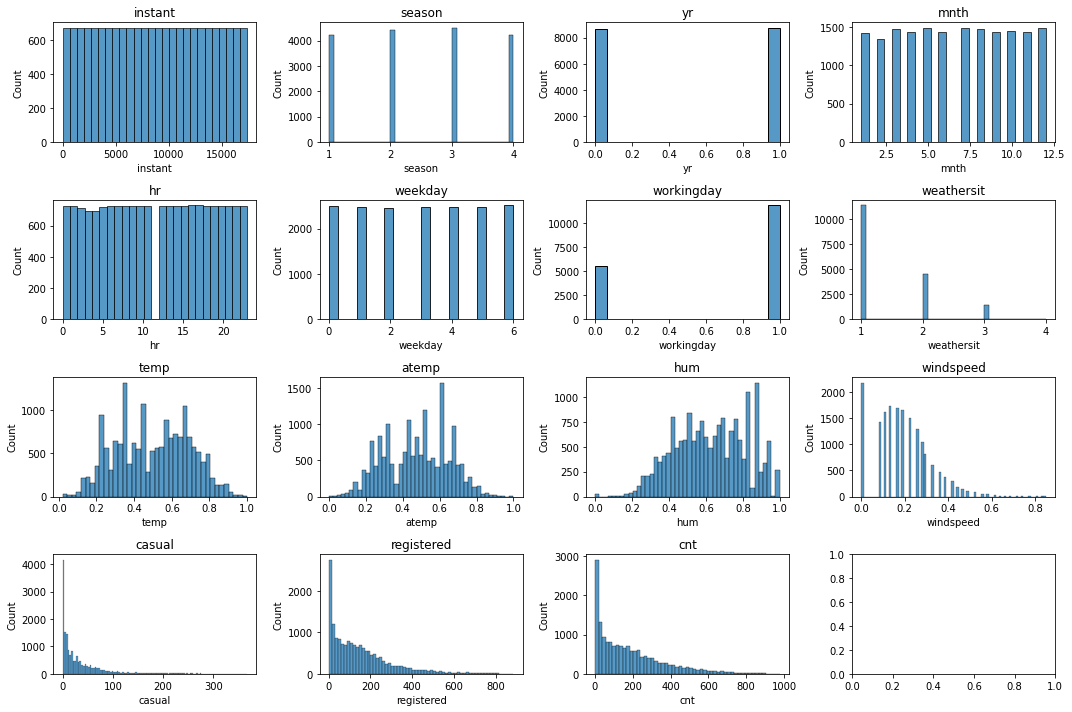

In [113]:
import seaborn as sns

fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 10))
axes = axes.flatten()

# loop through each column and plot the distribution
for i, col in enumerate(data.drop(['dteday', 'holiday'], axis=1).columns):
    sns.histplot(data[col], ax=axes[i])
    axes[i].set_title(col)

plt.tight_layout()
plt.show()

From the descriptive statistics we see that the distributions of the features are varies. To avoid scaling issues that can impact the performance of some models it might be a good idea to perform normalization and standardization.

## Data cleaning

In [4]:
data = data.drop(columns=['dteday', 'casual', 'registered'])

In [10]:
data['weathersit'].value_counts()

1    11413
2     4544
3     1419
4        3
Name: weathersit, dtype: int64

## Feature Engineering

#### Encoding categorical variables to numerical values

In [11]:
data.head()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,16
1,2,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,40
2,3,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,32
3,4,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,13
4,5,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,1


In [5]:
from sklearn.preprocessing import OneHotEncoder

ohe = OneHotEncoder()
trans_season = ohe.fit_transform(data[['season']])
data[ohe.categories_[0]] = trans_season.toarray()
data = data.drop(columns=['season'])
data = data.rename(columns={1:'season_1', 2:'season_2', 3:'season_3', 4:'season_4'})

In [6]:
ohe = OneHotEncoder()
trans_yr = ohe.fit_transform(data[['yr']])
data[ohe.categories_[0]] = trans_yr.toarray()
data = data.drop(columns=['yr'])
data = data.rename(columns={0:'year_0', 1:'year_1'})

In [7]:
ohe = OneHotEncoder()
trans_mnth = ohe.fit_transform(data[['mnth']])
data[ohe.categories_[0]] = trans_mnth.toarray()
data = data.drop(columns=['mnth'])
data = data.rename(columns={1:'mnth_1', 2:'mnth_2', 3:'mnth_3', 4:'mnth_4', 5:'mnth_5', 6:'mnth_6', 7:'mnth_7', 8:'mnth_8', 9:'mnth_9', 10:'mnth_10', 11:'mnth_11', 12:'mnth_12'})

In [8]:
ohe = OneHotEncoder()
trans_hr = ohe.fit_transform(data[['hr']])
data[ohe.categories_[0]] = trans_hr.toarray()
data = data.drop(columns=['hr'])
data = data.rename(columns={0:'hr_0', 1:'hr_1', 2:'hr_2', 3:'hr_3', 4:'hr_4', 5:'hr_5', 6:'hr_6', 7:'hr_7', 8:'hr_8', 9:'hr_9', 10:'hr_10', 11:'hr_11', 12:'hr_12', 13:'hr_13', 14:'hr_14', 15:'hr_15', 16:'hr_16', 17:'hr_17', 18:'hr_18', 19:'hr_19', 20:'hr_20', 21:'hr_21', 22:'hr_22', 23:'hr_23'})

In [9]:
ohe = OneHotEncoder()
trans_holiday = ohe.fit_transform(data[['holiday']])
data[ohe.categories_[0]] = trans_holiday.toarray()
data = data.drop(columns=['holiday'])
data = data.rename(columns={0:'holiday_0', 1:'holiday_1'})

In [10]:
ohe = OneHotEncoder()
trans_weekday = ohe.fit_transform(data[['weekday']])
data[ohe.categories_[0]] = trans_weekday.toarray()
data = data.drop(columns=['weekday'])
data = data.rename(columns={0:'weekday_0', 1:'weekday_1', 2:'weekday_2', 3:'weekday_3', 4:'weekday_4', 5:'weekday_5', 6:'weekday_6'})

In [11]:
ohe = OneHotEncoder()
trans_workingday = ohe.fit_transform(data[['workingday']])
data[ohe.categories_[0]] = trans_workingday.toarray()
data = data.drop(columns=['workingday'])
data = data.rename(columns={0:'workingday_0', 1:'workingday_1'})

In [12]:
ohe = OneHotEncoder()
trans_weathersit = ohe.fit_transform(data[['weathersit']])
data[ohe.categories_[0]] = trans_weathersit.toarray()
data = data.drop(columns=['weathersit'])
data = data.rename(columns={1:'weathersit_1', 2:'weathersit_2', 3:'weathersit_3', 4:'weathersit_4'})

In [20]:
print(data.columns)
print(len(data.columns))

Index(['instant', 'temp', 'atemp', 'hum', 'windspeed', 'cnt', 'season_1',
       'season_2', 'season_3', 'season_4', 'year_0', 'year_1', 'mnth_1',
       'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5', 'mnth_6', 'mnth_7', 'mnth_8',
       'mnth_9', 'mnth_10', 'mnth_11', 'mnth_12', 'hr_0', 'hr_1', 'hr_2',
       'hr_3', 'hr_4', 'hr_5', 'hr_6', 'hr_7', 'hr_8', 'hr_9', 'hr_10',
       'hr_11', 'hr_12', 'hr_13', 'hr_14', 'hr_15', 'hr_16', 'hr_17', 'hr_18',
       'hr_19', 'hr_20', 'hr_21', 'hr_22', 'hr_23', 'holiday_0', 'holiday_1',
       'weekday_0', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weekday_6', 'workingday_0', 'workingday_1',
       'weathersit_1', 'weathersit_2', 'weathersit_3', 'weathersit_4'],
      dtype='object')
63


# Predictive modeling

Standardization function is copied from PS4:

In [13]:
import numpy as np

def standardize(raw_data):
    return ((raw_data - np.mean(raw_data, axis = 0)) / np.std(raw_data, axis = 0))

In [14]:
from sklearn.model_selection import train_test_split

X = data.loc[:, data.columns != 'cnt']
y = data['cnt']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

X.head()

,instant,temp,atemp,hum,windspeed,season_1,season_2,season_3,season_4,year_0,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,1,0.24,0.2879,0.81,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
1,2,0.22,0.2727,0.80,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
2,3,0.22,0.2727,0.80,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
3,4,0.24,0.2879,0.75,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0
4,5,0.24,0.2879,0.75,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,0.0


## Method 1: Logistic Regression

In [15]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
score = log_reg.score(X_test, y_test)
print(score)

0.014672036823935558


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## Method 2: Multiple Linear Regression

In [41]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
score = lin_reg.score(X_train, y_train)
print(f'Predictive score on training data {score:.4f}')

score = lin_reg.score(X_test, y_test)
print(f'Predictive score on test data {score:.4f}')

Predictive score on training data 0.6896
Predictive score on test data 0.6719


## Method 3: K-Nearest Neighbors

In [42]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
train_score = knn.score(X_train, y_train)
print(f'Predictive score on training data {train_score:.4f}')
test_score = knn.score(X_test, y_test)
print(f'Predictive score on test data {test_score:.4f}')

Predictive score on training data 0.1318
Predictive score on test data 0.0158


In [43]:
from sklearn.model_selection import GridSearchCV

knn_tuned = KNeighborsClassifier()
param_grid = {'n_neighbors':range(1,15), 'p':range(1,3)}
grid_search = GridSearchCV(knn_tuned, param_grid, return_train_score=True)
grid_search.fit(X_train, y_train)
test_accuracy = grid_search.cv_results_['mean_test_score'].mean()
train_accuracy = grid_search.cv_results_['mean_train_score'].mean()

print(f'Predictive score on training data {train_accuracy:.4f}')
print(f'Predictive score on test data {test_accuracy:.4f}')

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Predictive score on training data 0.2115
Predictive score on test data 0.0125


## Method 4. Gradient Boosting

In [48]:
from sklearn.ensemble import GradientBoostingRegressor

param_grid = {
    'learning_rate': [0.01, 0.1, 0.5],
    'max_depth': [2, 5, 6, 7, 9, 11],
    'n_estimators': [10, 50, 100],
    'min_samples_leaf': [1, 3, 5, 7, 9]
}

gbm = GradientBoostingRegressor(random_state=seed)

cv_search = GridSearchCV(gbm, param_grid, cv=5, verbose=True, n_jobs=-1).fit(X_train, y_train)
print("best parameters:", cv_search.best_params_)
# best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'min_samples_leaf': 7, 'n_estimators': 100}

Fitting 5 folds for each of 270 candidates, totalling 1350 fits
best parameters: {'learning_rate': 0.1, 'max_depth': 11, 'min_samples_leaf': 7, 'n_estimators': 100}


In [49]:
print('Training set {:.4f}'.format(cv_search.best_estimator_.fit(X_train, y_train).score(X_train, y_train)))
print('Cross-validated set: {:.4f}'.format(cv_search.best_score_))
print('Test set: {:.4f}'.format(cv_search.best_estimator_.score(X_test, y_test)))

Training accuracy score 0.9865
Cross-validated accuracy score: 0.9387
Test performance: 0.9440


## Method 5. Decision Trees

## Method 6. Random Forest

## Method 7. Support Vector Machine

## Method 8. Neural Networks